<b>classify the Size_Categorie using SVM

month	month of the year: 'jan' to 'dec'
day	day of the week: 'mon' to 'sun'
FFMC	FFMC index from the FWI system: 18.7 to 96.20
DMC	DMC index from the FWI system: 1.1 to 291.3
DC	DC index from the FWI system: 7.9 to 860.6
ISI	ISI index from the FWI system: 0.0 to 56.10
temp	temperature in Celsius degrees: 2.2 to 33.30
RH	relative humidity in %: 15.0 to 100
wind	wind speed in km/h: 0.40 to 9.40
rain	outside rain in mm/m2 : 0.0 to 6.4
Size_Categorie 	the burned area of the forest ( Small , Large)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

In [2]:
data = pd.read_csv(r'D:\Excelr Data Science assignment\Support Vector machine\forestfires.csv')

In [3]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
data.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


<b>EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
data.describe(include='all')

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517
unique,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,small
freq,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378
mean,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,...,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,NaN
std,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,...,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,NaN
min,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [7]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:
data['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [9]:
data_2 = data.drop(data.iloc[:,11:30],axis=1)
data_2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


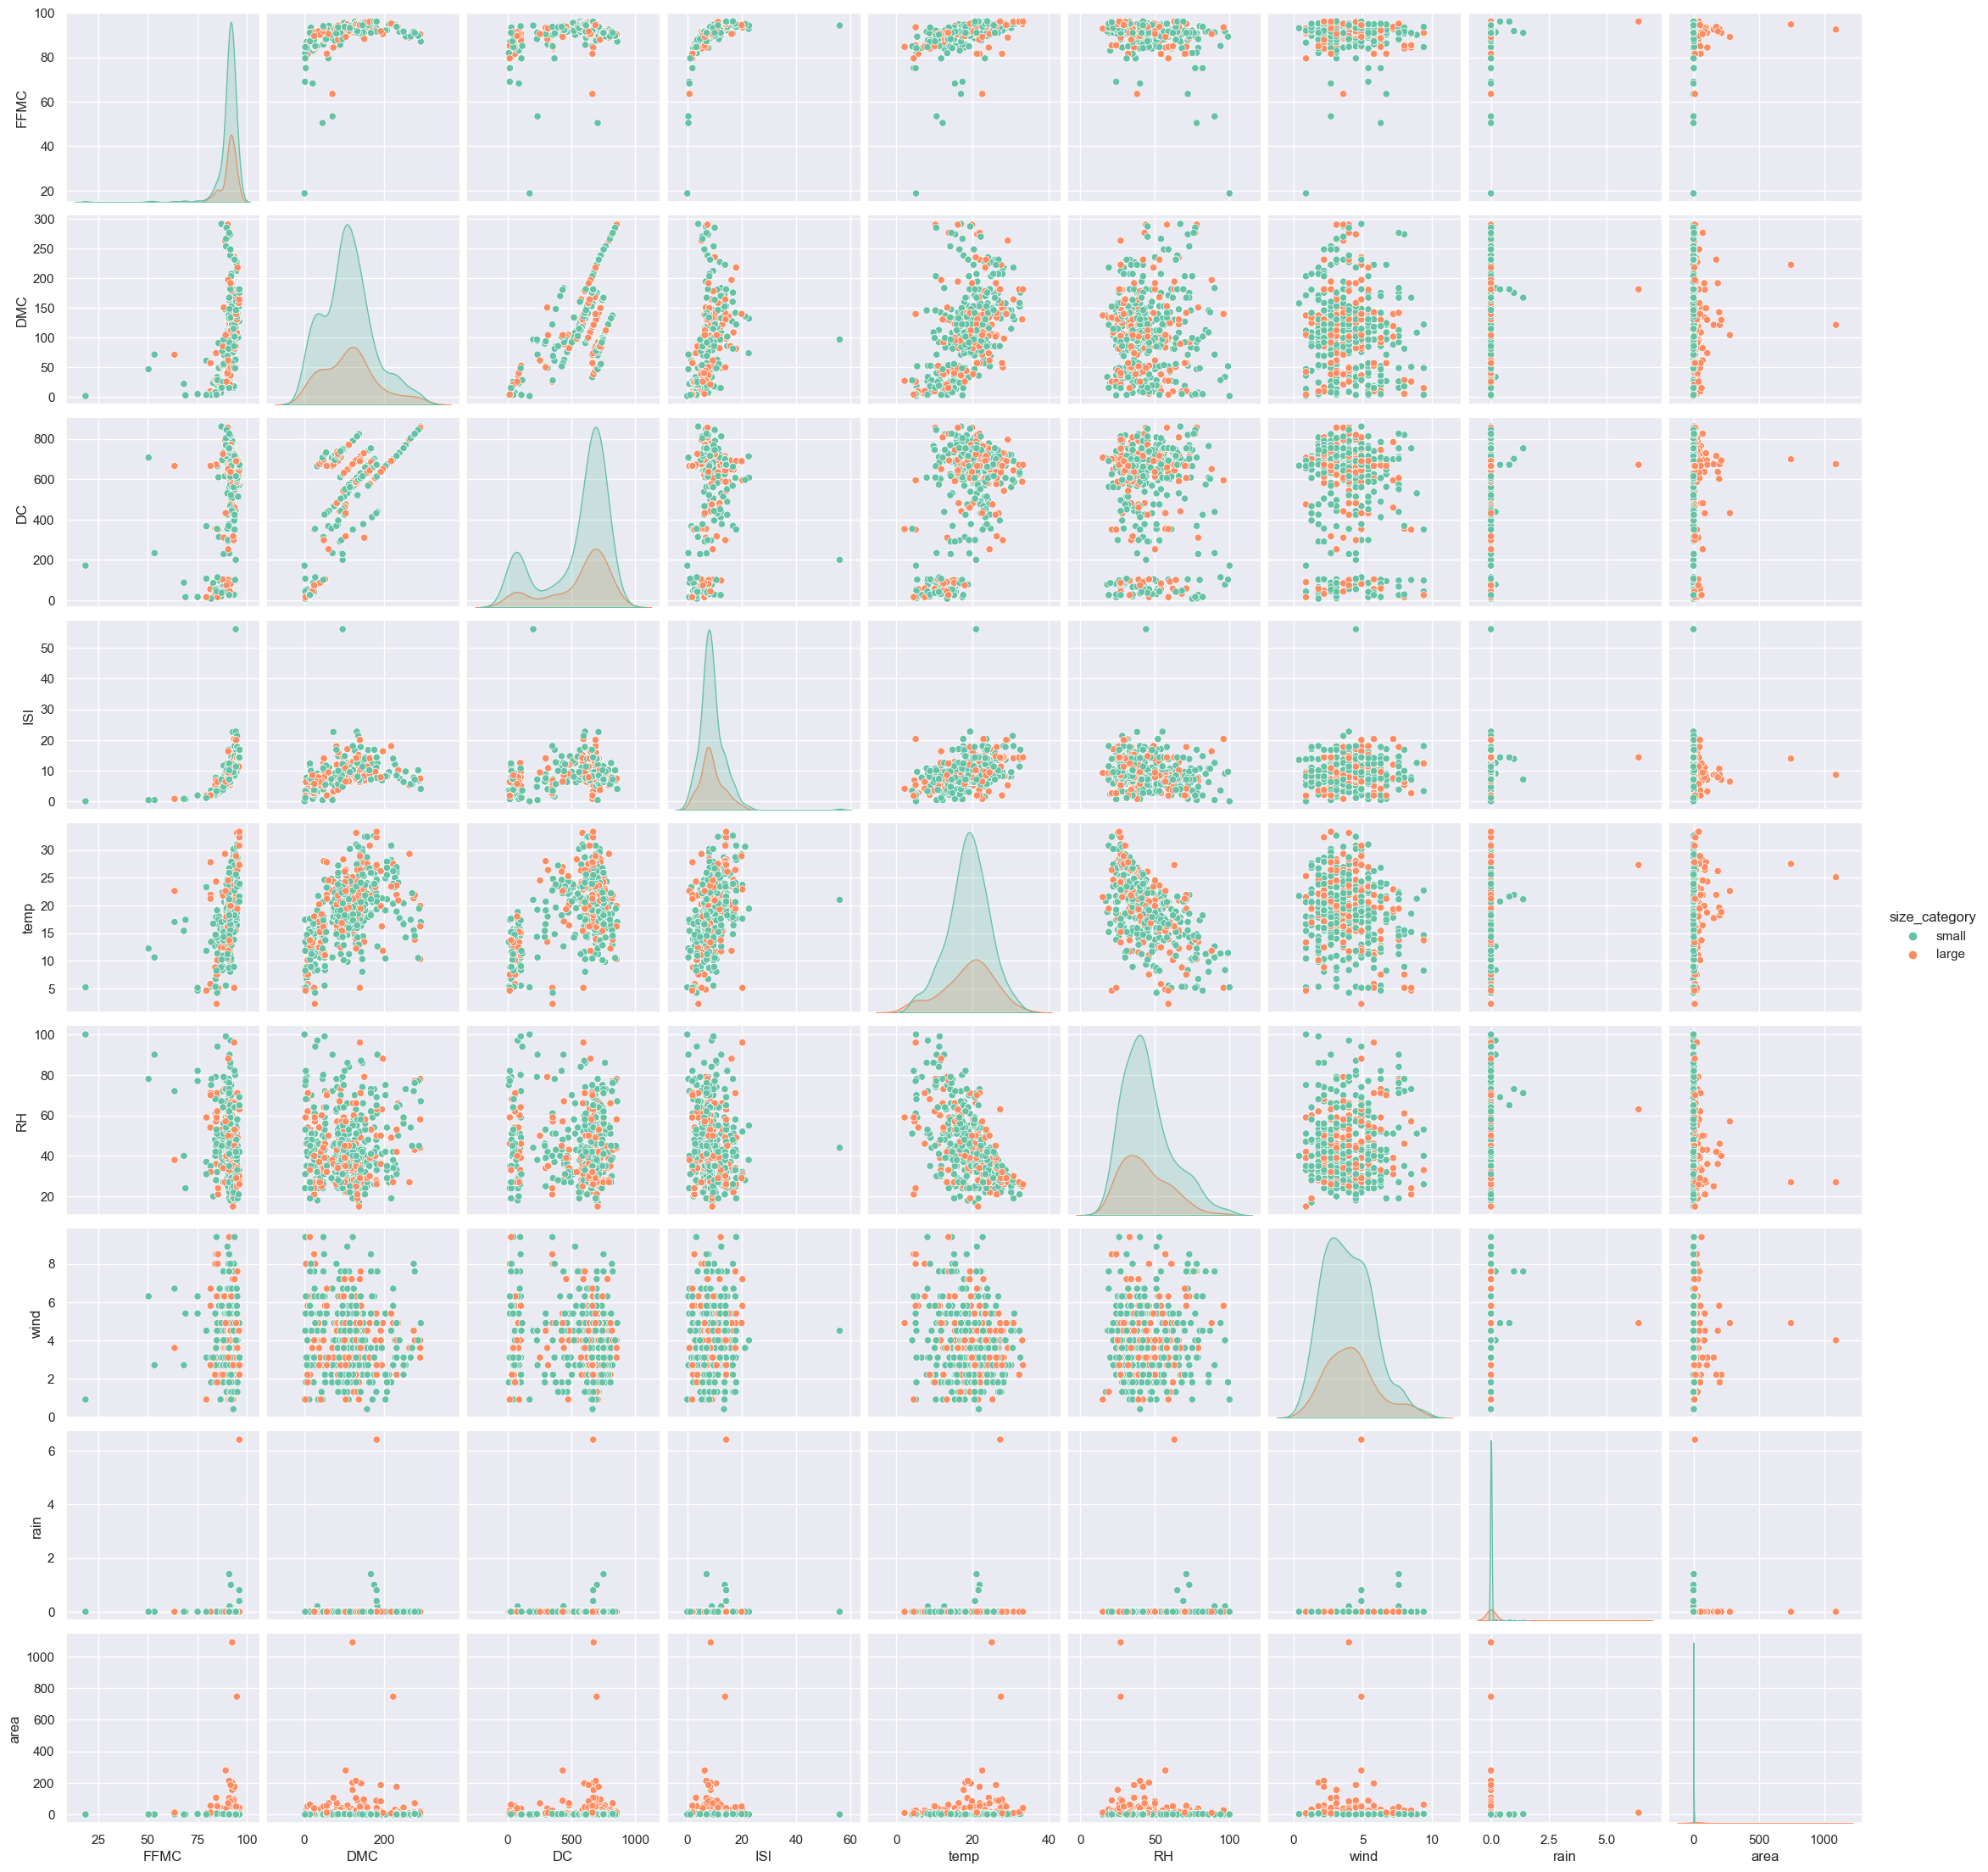

In [10]:
sns.pairplot(data_2,hue='size_category',palette='Set2')

C:\Users\CSC\AppData\Local\Temp\ipykernel_9744\266855208.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_2.corr(),annot=True,cmap='cubehelix')


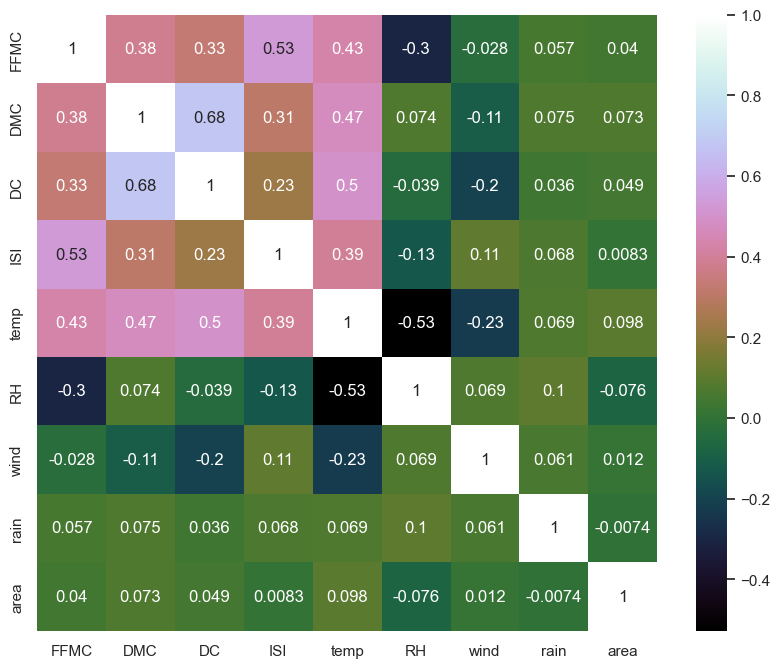

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(data_2.corr(),annot=True,cmap='cubehelix')
plt.show()

<Axes: xlabel='size_category', ylabel='count'>

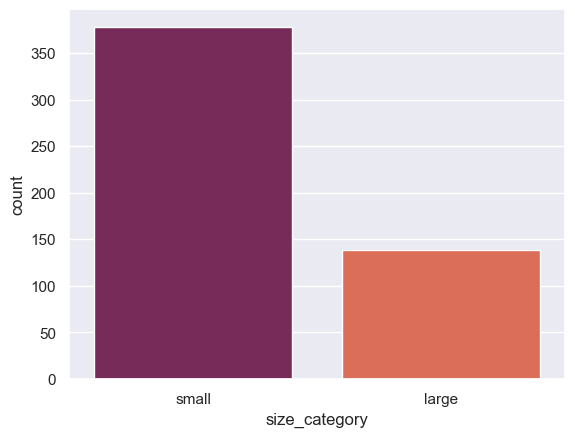

In [12]:
sns.countplot(x=data['size_category'],data=data,palette='rocket')

<b>DATA PREPROCESSING

In [13]:
#Let us drop categorical variables
data_3 = data.drop(['month','day'],axis=1)
data_3

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [14]:
#X and Y (Target and Features)
x = data_3.drop(['size_category'],axis=1)
y = data_3['size_category']

<b>Model Building

In [15]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report

In [16]:
#Train_Test_Split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(413, 28)
(413,)
(104, 28)
(104,)


In [17]:
#Model_1 = kernel - 'rbf'
model_1 = SVC(kernel='rbf')
model_1.fit(x_train,y_train)
y_pred_1 = model_1.predict(x_test)
print(y_pred_1)
print('====================================================================================================')
print('Confusion_Matrix: ','\n',confusion_matrix(y_test,y_pred_1))
print('====================================================================================================')
print('Classification_Report: ','\n',classification_report(y_test,y_pred_1))

['small' 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small'
 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small'
 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small'
 'small' 'small' 'large' 'small' 'small' 'small' 'small' 'small' 'small'
 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small'
 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small'
 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small'
 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'large'
 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'large'
 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'large'
 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small'
 'small' 'small' 'small' 'small' 'small']
Confusion_Matrix:  
 [[ 4 26]
 [ 0 74]]
Classification_Report:  
               precision    recall  f1-score   support

       large       1.00      0.13 

In [18]:
#Model_2 = kernel - 'linear'
model_2 = SVC(kernel='linear')
model_2.fit(x_train,y_train)
y_pred_2 = model_2.predict(x_test)
print(y_pred_2)
print('====================================================================================================')
print('Confusion_Matrix: ','\n',confusion_matrix(y_test,y_pred_2))
print('====================================================================================================')
print('Classification_Report: ','\n',classification_report(y_test,y_pred_2))

['small' 'small' 'small' 'small' 'small' 'small' 'large' 'small' 'small'
 'small' 'large' 'small' 'large' 'small' 'small' 'large' 'small' 'large'
 'small' 'small' 'small' 'small' 'small' 'small' 'large' 'small' 'large'
 'small' 'small' 'large' 'small' 'large' 'small' 'large' 'small' 'small'
 'small' 'large' 'large' 'large' 'large' 'small' 'small' 'large' 'small'
 'large' 'small' 'small' 'small' 'small' 'large' 'large' 'small' 'large'
 'small' 'large' 'small' 'small' 'small' 'small' 'small' 'large' 'small'
 'small' 'large' 'large' 'small' 'small' 'small' 'small' 'small' 'large'
 'small' 'small' 'small' 'small' 'large' 'small' 'small' 'small' 'large'
 'small' 'small' 'small' 'small' 'large' 'small' 'small' 'small' 'large'
 'large' 'large' 'small' 'small' 'small' 'small' 'large' 'large' 'small'
 'small' 'large' 'small' 'small' 'small']
Confusion_Matrix:  
 [[30  0]
 [ 3 71]]
Classification_Report:  
               precision    recall  f1-score   support

       large       0.91      1.00 

In [20]:
#Model_3 = kernel - 'poly'
model_3 = SVC(kernel='poly')
model_3.fit(x_train,y_train)
y_pred_3 = model_3.predict(x_test)
print(y_pred_3)
print('====================================================================================================')
print('Confusion_Matrix: ','\n',confusion_matrix(y_test,y_pred_3))
print('====================================================================================================')
print('Classification_Report: ','\n',classification_report(y_test,y_pred_3))

['small' 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small'
 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small'
 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small'
 'small' 'small' 'large' 'small' 'small' 'small' 'small' 'small' 'small'
 'small' 'large' 'small' 'small' 'small' 'small' 'small' 'small' 'small'
 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small'
 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small'
 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'large'
 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'large'
 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'large'
 'small' 'small' 'small' 'small' 'small' 'small' 'large' 'small' 'small'
 'small' 'small' 'small' 'small' 'small']
Confusion_Matrix:  
 [[ 6 24]
 [ 0 74]]
Classification_Report:  
               precision    recall  f1-score   support

       large       1.00      0.20 

In [21]:
#Model_4 = kernel - 'sigmoid'
model_4 = SVC(kernel='sigmoid')
model_4.fit(x_train,y_train)
y_pred_4 = model_4.predict(x_test)
print(y_pred_4)
print('====================================================================================================')
print('Confusion_Matrix: ','\n',confusion_matrix(y_test,y_pred_4))
print('====================================================================================================')
print('Classification_Report: ','\n',classification_report(y_test,y_pred_4))

['small' 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small'
 'small' 'small' 'small' 'small' 'small' 'large' 'small' 'small' 'small'
 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small'
 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small'
 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small'
 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small'
 'small' 'small' 'small' 'small' 'small' 'small' 'large' 'small' 'small'
 'large' 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small'
 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small'
 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small'
 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'small'
 'small' 'small' 'small' 'small' 'small']
Confusion_Matrix:  
 [[ 0 30]
 [ 3 71]]
Classification_Report:  
               precision    recall  f1-score   support

       large       0.00      0.00 

<b>Comparision of Results

In [22]:
from sklearn.metrics import accuracy_score
com = pd.DataFrame({'Model':['rbf','linear','ploy','sigmoid'],'Accuracy':[accuracy_score(y_test,y_pred_1),accuracy_score(y_test,y_pred_2),accuracy_score(y_test,y_pred_3),accuracy_score(y_test,y_pred_4)]})
com             

,Model,Accuracy
0,rbf,0.750000
1,linear,0.971154
2,ploy,0.769231
3,sigmoid,0.682692


<b>Model_2 with kernel = 'linear' gives the best results

In [23]:
#GridSearchCV to find C
from sklearn.model_selection import GridSearchCV
mod = SVC()
param_grid = {'kernel':['linear'],'gamma':['scale','auto'],'C':np.arange(1,10)}
grid_search = GridSearchCV(mod,param_grid,scoring='accuracy',cv=5,n_jobs=-1,return_train_score=True)

In [24]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'gamma': ['scale', 'auto'], 'kernel': ['linear']},
             return_train_score=True, scoring='accuracy')

In [25]:
y_pred_cv = grid_search.predict(x_test)
y_pred_cv

array(['small', 'small', 'small', 'small', 'small', 'small', 'large',
       'small', 'small', 'small', 'large', 'small', 'large', 'small',
       'small', 'large', 'small', 'large', 'small', 'small', 'small',
       'small', 'small', 'small', 'large', 'small', 'large', 'small',
       'small', 'large', 'small', 'large', 'small', 'large', 'small',
       'small', 'small', 'large', 'large', 'large', 'large', 'small',
       'small', 'large', 'small', 'large', 'small', 'small', 'small',
       'small', 'large', 'large', 'small', 'large', 'small', 'large',
       'small', 'small', 'small', 'small', 'small', 'large', 'small',
       'small', 'large', 'large', 'small', 'small', 'small', 'small',
       'small', 'large', 'small', 'small', 'small', 'small', 'large',
       'small', 'small', 'small', 'large', 'small', 'small', 'small',
       'small', 'large', 'small', 'small', 'small', 'large', 'large',
       'large', 'small', 'small', 'small', 'small', 'large', 'large',
       'small', 'sma

In [26]:
grid_search.best_score_

0.9854540111666177

In [27]:
grid_search.best_estimator_

SVC(C=1, kernel='linear')

In [28]:
accuracy_score(y_test,y_pred_cv)

0.9711538461538461

<b>GridSearchCV returns a C valur equals to 1 which we have already deployed in model_2 which holds good

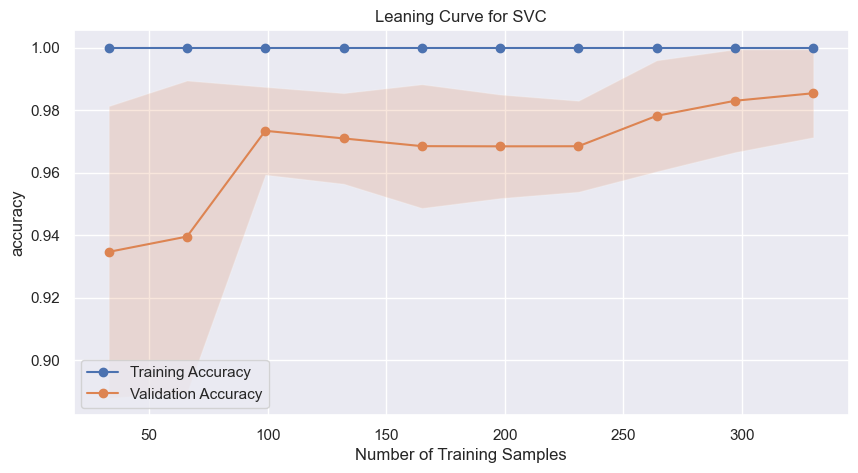

In [29]:
#Plotting Learning Curve
from sklearn.model_selection import learning_curve
train_sizes , train_score , valid_score = learning_curve(model_2,x_train,y_train,cv=5,train_sizes=np.linspace(0.1,1,10),scoring='accuracy',n_jobs=-1) 

train_mean = np.mean(train_score,axis=1)
train_std = np.std(train_score,axis=1)
valid_mean = np.mean(valid_score,axis=1)
valid_std = np.std(valid_score,axis=1)

# Plot the learning curve
plt.figure(figsize=(10,5))
plt.plot(train_sizes,train_mean,label='Training Accuracy',marker='o')
plt.fill_between(train_sizes,train_mean-train_std,train_mean+train_std,alpha=0.2)
plt.plot(train_sizes,valid_mean,label='Validation Accuracy',marker='o')
plt.fill_between(train_sizes,valid_mean-valid_std,valid_mean+valid_std,alpha=0.2)
plt.xlabel('Number of Training Samples')
plt.ylabel('accuracy')
plt.title("Leaning Curve for SVC")
plt.legend(loc='best')
plt.show()

<b>As the number of samples increases Validation score approches 1 which is a good sign

<b>Conclusion:<br> 
    
<b>Model_2 with Kernal='linear' gives the best results